# 1 - Import packages

In [1]:
import pandas as pd
import os
import scanpy as sp
import anndata
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# 2 - Load data

## 2.1 - Raw read counts

### 2.1.1 - Load read count data

In [2]:
# Load your RNA-seq counts
# Replace 'path/to/your/counts.csv' with the actual path to your RNA-seq count file
counts = pd.read_csv('Processed data/final_output.tsv', sep = '\t',index_col = 0)

### 2.1.2 - count data processing

In [3]:
# Transpose data
counts_T = counts.T

# Assuming counts_T is your transposed DataFrame with 'GeneID' as the column index name
counts_T.columns.name = None
# Change index name
counts_T.index.name = 'HudAlphaID'
# Sort index 
counts_T.sort_index(ascending=True,inplace = True)
counts_T.head()

,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000284332.1,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.2,ENSG00000186092.6,ENSG00000238009.6,...,ENSG00000273739.1,ENSG00000276700.1,ENSG00000276312.1,ENSG00000275757.1,ENSG00000278573.1,ENSG00000276017.1,ENSG00000278817.1,ENSG00000277196.4,ENSG00000278625.1,ENSG00000277374.1
HudAlphaID,,,,,,,,,,,,,,,,,,,,,
5104-SL-2821,9,113,17,3,0,2,1,5,2,111,...,3,5,10,0,0,1,6,4,0,0
5104-SL-2823,2,42,17,0,0,0,0,0,0,46,...,0,2,14,0,0,0,3,0,0,0
5104-SL-2826,0,1,0,0,0,0,0,0,0,12,...,0,0,333,3,0,0,0,0,0,0
5104-SL-2827,6,130,17,0,0,0,0,0,1,61,...,3,21,12,1,0,0,2,0,0,0
5104-SL-2829,0,123,12,0,0,0,0,0,0,79,...,0,0,3,0,0,0,7,1,0,0


## 2.2 - NGS metadata

### 2.2.1 - Load metadata

In [4]:
# Load both metadata files

metadataIR3 = pd.read_csv('NGS_metadata/metaDataIR3.csv')
metadata = pd.read_csv('NGS_metadata/meta_data.11192021.csv')

In [5]:
print(len(metadata['HudAlphaSampleName'].unique()))
print(len(metadataIR3['HudAlphaID'].unique()))

4850
4871


In [6]:
display(metadata.head())

display(metadataIR3.head())

,HudAlphaSampleName,Small RNA-Seq,Long RNA-seq,PATNO,PATNO Visit,QC,PoolAssign,Phase,Disease Status,Study Arm,...,Multimapped (%),Uniquely mapped (%),Total reads,UPDRS1 score,UPDRS2 score,UPDRS3 score,UPDRS4 score,UPDRS totscore,UPSIT,moca
0,5104-SL-0181,Yes,Yes,PP-3588,3588_BL,HighQC,Sample,phase1,Idiopathic PD,PD,...,15.0,74.2,87316046.0,5.0,17.0,30.0,NaN,52.0,27.0,29.0
1,5104-SL-2720,No,Yes,PP-3181,3181_V02,HighQC,Sample,phase2,Idiopathic PD,PD,...,29.8,63.3,102798029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5104-SL-3189,Yes,Yes,PP-3332,3332_V02,HighQC,Sample,phase2,Idiopathic PD,PD,...,21.7,67.3,111752310.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5104-SL-3093,Yes,Yes,PP-3424,3424_V02,HighQC,Sample,phase2,Healthy Control,HC,...,25.7,65.0,117351296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5104-SL-3377,No,Yes,PP-4083,4083_V02,HighQC,Sample,phase2,Idiopathic PD,PD,...,43.5,45.5,112465601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,HudAlphaID,QCflagIR3,Specimen Bar Code,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,Specimen Bar Code.1,Quantity (ug),Concentration (ng/ul),...,MEDIAN_3PRIME_BIAS,NUM_UNEXPLAINED_READS,PCT_RIBOSOMAL_BASES,PCT_INTRONIC_BASES,PCT_R2_TRANSCRIPT_STRAND_READS,PCT_MRNA_BASES,MEDIAN_5PRIME_TO_3PRIME_BIAS,PCT_R1_TRANSCRIPT_STRAND_READS,MEDIAN_5PRIME_BIAS,PCT_USABLE_BASES
0,5104-SL-0001,pass,0000373111,3174,Male,PD,V08,0000373111,1.0,115.90,...,0.845235,1093161,0.0,43.4564,98.1025,50.4726,1.191875,1.8975,1.019442,47.9359
1,5104-SL-0002,pass,PP0016-0526,3201,Female,Control,BL,PP0016-0526,1.0,80.07,...,0.913436,569224,0.0,52.9752,98.1428,40.6987,1.058616,1.8572,0.965040,39.6130
2,5104-SL-0003,pass,0003125874,3057,Female,Control,V06,0003125874,1.0,219.70,...,0.902573,485102,0.0,52.2706,95.4321,36.0884,1.095971,4.5679,0.997003,34.8096
3,5104-SL-0004,pass,0003179818,4126,Male,PD,V04,0003179818,1.0,100.06,...,0.856690,1145227,0.0,45.9355,98.3785,48.3407,1.170152,1.6215,1.013765,45.3119
4,5104-SL-0005,pass,0003164601,4117,Female,PD,BL,0003164601,1.0,124.40,...,0.894656,461631,0.0,58.3984,98.0678,35.8255,1.113733,1.9322,0.985280,34.8793


In [7]:
# Step 1: Merge the dataframes
merged_df = pd.merge(metadataIR3, metadata, how='left', left_on = 'HudAlphaID', right_on = 'HudAlphaSampleName')

# Step 2: Remove duplicated columns
# This step assumes you want to remove columns that are identical in name and content.
# For columns with the same name but different content, you'd need additional logic.

# First, identify duplicate column names and keep only one instance of each.
columns_to_keep = {}
for column in merged_df.columns:
    if column in columns_to_keep:
        if merged_df[column].equals(merged_df[columns_to_keep[column]]):
            # If the data in both columns is identical, we can safely drop one
            continue
        else:
            # If the data is different, consider renaming or deciding which one to keep
            new_name = column + '_y'  # Example renaming strategy
            columns_to_keep[new_name] = column
            merged_df.rename(columns={column: new_name}, inplace=True)
    else:
        columns_to_keep[column] = column

# Now, create a dataframe with only the chosen columns
cleaned_df = merged_df[list(columns_to_keep.keys())]

In [8]:
cleaned_df.head()

,HudAlphaID,QCflagIR3,Specimen Bar Code,PATNO_x,GENDER,DIAGNOSIS,CLINICAL_EVENT,Specimen Bar Code.1,Quantity (ug),Concentration (ng/ul),...,Multimapped (%),Uniquely mapped (%),Total reads,UPDRS1 score,UPDRS2 score,UPDRS3 score,UPDRS4 score,UPDRS totscore,UPSIT,moca
0,5104-SL-0001,pass,0000373111,3174,Male,PD,V08,0000373111,1.0,115.90,...,18.2,77.4,196558868.0,8.0,6.0,36.0,6.0,58.0,NaN,28.0
1,5104-SL-0002,pass,PP0016-0526,3201,Female,Control,BL,PP0016-0526,1.0,80.07,...,5.8,91.9,120507739.0,6.0,4.0,0.0,NaN,10.0,35.0,28.0
2,5104-SL-0003,pass,0003125874,3057,Female,Control,V06,0003125874,1.0,219.70,...,11.9,85.0,103137046.0,9.0,0.0,1.0,NaN,10.0,NaN,28.0
3,5104-SL-0004,pass,0003179818,4126,Male,PD,V04,0003179818,1.0,100.06,...,15.0,79.6,142805721.0,0.0,2.0,7.0,0.0,19.0,NaN,28.0
4,5104-SL-0005,pass,0003164601,4117,Female,PD,BL,0003164601,1.0,124.40,...,5.2,92.6,104243414.0,7.0,8.0,9.0,NaN,24.0,30.0,25.0


In [9]:
def compare_arrays_detailed(arr1, arr2):
    # Initialize a result list to store messages about discrepancies
    discrepancies = []
    
    # Check if the lengths of the arrays are the same
    if len(arr1) != len(arr2):
        discrepancies.append(f"Array lengths differ: Array 1 has {len(arr1)} elements, Array 2 has {len(arr2)} elements.")
    
    # Check for differences in content
    # Convert arrays to sets for comparison
    set1 = set(arr1)
    set2 = set(arr2)
    
    # Find elements present in one array but not the other
    unique_to_arr1 = set1 - set2
    unique_to_arr2 = set2 - set1
    
    if unique_to_arr1:
        discrepancies.append(f"Elements unique to Array 1: {unique_to_arr1}")
    if unique_to_arr2:
        discrepancies.append(f"Elements unique to Array 2: {unique_to_arr2}")
    
    # If there are no discrepancies, return that the arrays are identical
    if not discrepancies:
        return "Arrays are identical."
    
    return discrepancies

In [10]:
# Assuming cleaned_df is your dataframe after initial cleaning
def find_and_remove_identical_columns(df):
    identical_columns = set()  # A set to store columns with identical content to another
    n = len(df.columns)
    for i in range(n):
        for j in range(i+1, n):
            col1, col2 = df.columns[i], df.columns[j]
            if col1 not in identical_columns and col2 not in identical_columns:
                if df[col1].equals(df[col2]):
                    # If the contents are identical, add one of them to the removal list
                    identical_columns.add(col2)

    # Inform about the identified columns for removal
    if identical_columns:
        print(f"Identified columns to remove due to identical content: {identical_columns}")
        # Proceed with removal
        df_unique_content = df.drop(columns=identical_columns)
        print("Columns with identical content have been removed.")
        return df_unique_content
    else:
        print("No columns with identical content were identified. No changes made.")
        return df

cleaned_df_unique_content = find_and_remove_identical_columns(cleaned_df)

Identified columns to remove due to identical content: {'Specimen Bar Code.1'}
Columns with identical content have been removed.


In [11]:
cleaned_df_unique_content.shape

(4871, 127)

In [12]:
metadata_filt = cleaned_df_unique_content[cleaned_df_unique_content['HudAlphaID'].isin(counts_T.index)]
metadata_filt.sort_values(by='HudAlphaID',ascending = True, inplace = True)

metadata_filt.set_index('HudAlphaID',inplace = True)
metadata_filt.shape

/tmp/ipykernel_1046/2153457361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_filt.sort_values(by='HudAlphaID',ascending = True, inplace = True)


(1047, 126)

In [13]:
metadata_filt[['DIAGNOSIS','Month','Phase','Disease Status', 'Diagnosis', 'Case Control']]

,DIAGNOSIS,Month,Phase,Disease Status,Diagnosis,Case Control
HudAlphaID,,,,,,
5104-SL-2821,Genetic Registry,M0,phase2,Genetic Unaffected,Genetic Registry,Control
5104-SL-2823,Genetic Registry,M0,phase2,Genetic PD,Genetic Registry,Case
5104-SL-2826,Control,M06,phase2,Healthy Control,Control,NaN
5104-SL-2827,Prodromal,M06,phase2,Prodromal,Prodromal,Other
5104-SL-2829,Genetic Registry,M24,phase2,Genetic PD,Genetic Registry,Case
...,...,...,...,...,...,...
5104-SL-4877,Genetic Registry,M0,phase2,Genetic Unaffected,Genetic Registry,Control
5104-SL-4879,Genetic Cohort,M06,phase2,Genetic PD,Genetic Cohort,Case
5104-SL-4884,Genetic Cohort,M06,phase2,Genetic PD,Genetic Cohort,Case


In [14]:
pd.crosstab(metadata_filt['Case Control'], metadata_filt['Month'])

Month,M0,M06,M12,M24,M36
Case Control,,,,,
Case,200,139,81,94,6
Control,228,85,38,52,6
Other,16,20,22,23,5


In [15]:
pd.crosstab(metadata_filt['Case Control'], metadata_filt['Month'])

Month,M0,M06,M12,M24,M36
Case Control,,,,,
Case,200,139,81,94,6
Control,228,85,38,52,6
Other,16,20,22,23,5


# 3 - RNA-seq data analysis 

In [16]:
# Now create the AnnData object
adata = sp.AnnData(X=counts_T, obs=metadata_filt)

# 3 - Processing data

## 3.1 - Compute QC metrics

In [17]:
sp.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

### 3.1.1 - Number of unique reads per sample

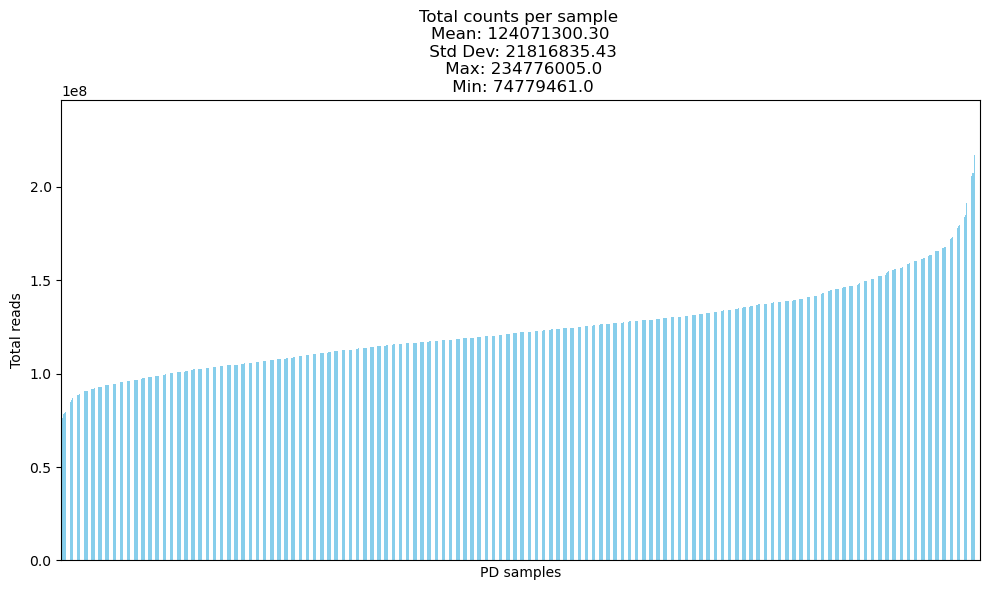

In [18]:
sorted_total_reads = adata.obs['Total reads'].sort_values()

# Compute summary statistics
mean_reads = sorted_total_reads.mean()
std_dev_reads = sorted_total_reads.std()
max_reads = sorted_total_reads.max()
min_reads = sorted_total_reads.min()

plt.figure(figsize=(10, 6))

sorted_total_reads.plot(kind='bar', color='skyblue')

# Adding the statistics to the plot title
plt.title(f'Total counts per sample \nMean: {mean_reads:.2f}\n Std Dev: {std_dev_reads:.2f}\n Max: {max_reads}\n Min: {min_reads}')
plt.xlabel('PD samples')
plt.ylabel('Total reads')
plt.xticks([])  # Suppressing the x-axis labels
plt.tight_layout()
plt.show()

### 3.1.1 - Number of counts and %rRNA 

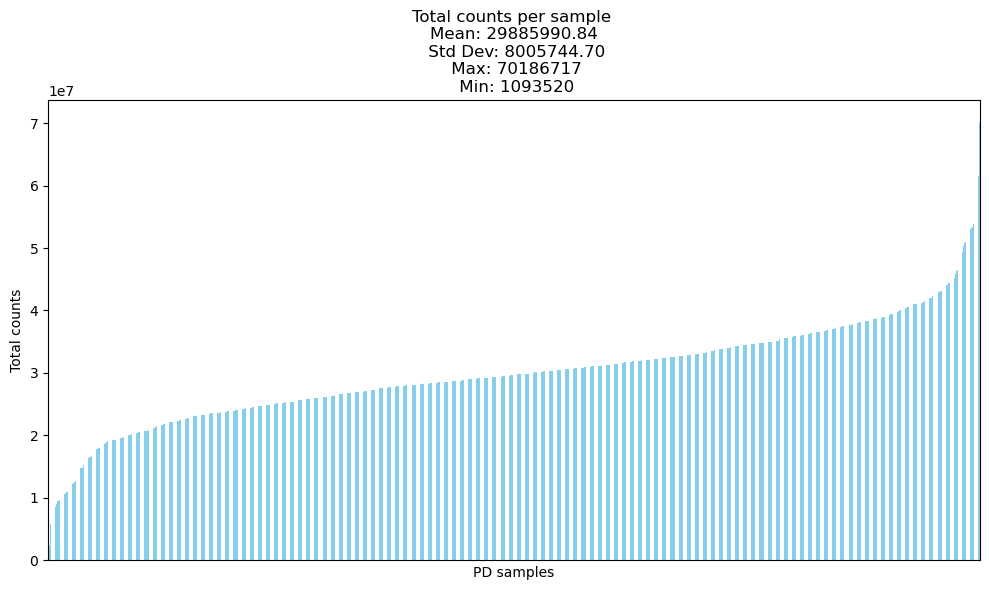

In [19]:
# Plotting the sorted data in a bar plot
sorted_reads = adata.obs['total_counts'].sort_values()

# Compute summary statistics
mean_reads = sorted_reads.mean()
std_dev_reads = sorted_reads.std()
max_reads = sorted_reads.max()
min_reads = sorted_reads.min()

plt.figure(figsize=(10, 6))

sorted_reads.plot(kind='bar', color='skyblue')

# Adding the statistics to the plot title
plt.title(f'Total counts per sample \nMean: {mean_reads:.2f}\n Std Dev: {std_dev_reads:.2f}\n Max: {max_reads}\n Min: {min_reads}')
plt.xlabel('PD samples')
plt.ylabel('Total counts')
plt.xticks([])  # Suppressing the x-axis labels
plt.tight_layout()
plt.show()

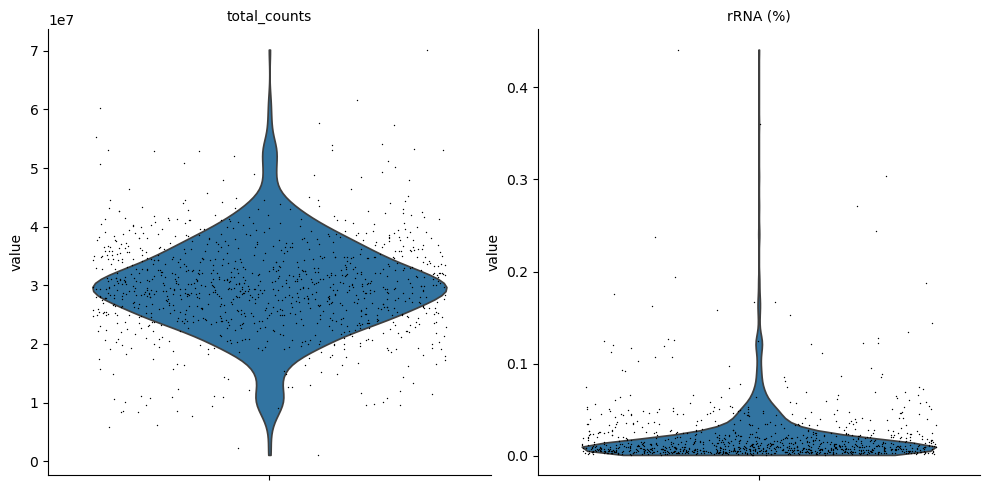

In [20]:
sp.pl.violin(adata, ['total_counts', 'rRNA (%)'],jitter=0.4, multi_panel=True)

## 3.1.2 - Correlation between total_counts and n_genes_by_counts

**n_genes_by_counts** computed by Scanpy typically refers to the number of genes detected in each sample based on a specified count threshold. Essentially, it's a count of **how many genes have non-zero expression levels** in each sample.

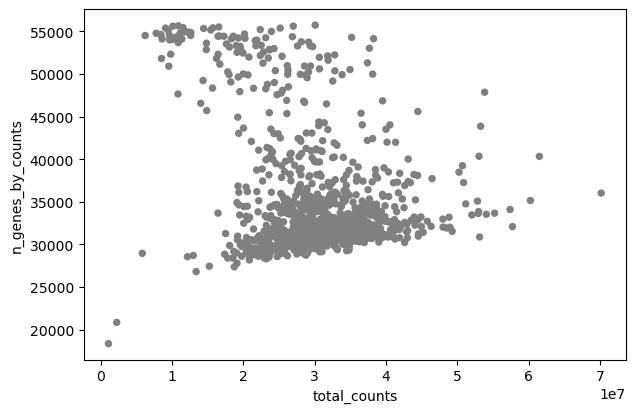

In [21]:
sp.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

# 4 - Feature selection

**n_cells_by_counts:** The number of samples in which a given gene is expressed (i.e., has a non-zero count).
                                                                             
A higher number indicates that more multiple samples exhibited expression of a given gene

/tmp/ipykernel_1046/2975451227.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gene_means, bins=30, kde=True)


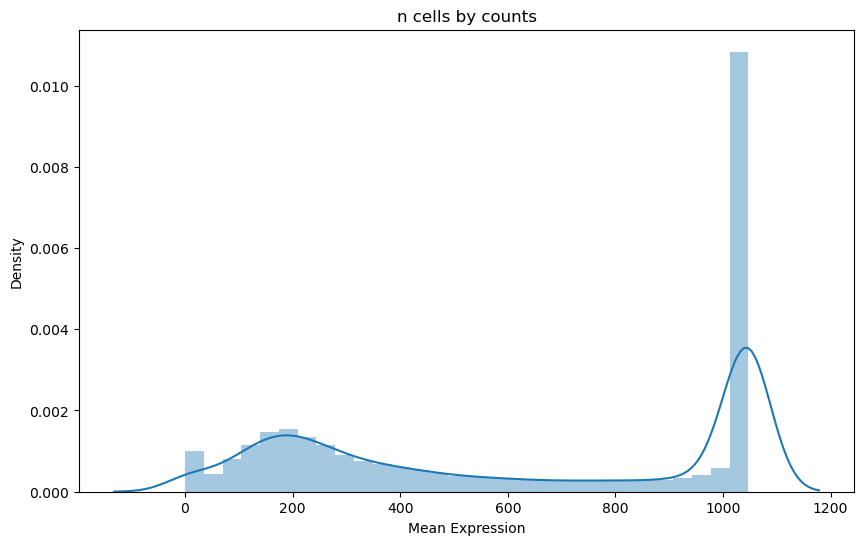

In [22]:
# Assuming 'mean_expression' is a column in adata.var
gene_means = adata.var['n_cells_by_counts']

plt.figure(figsize=(10,6))
sns.distplot(gene_means, bins=30, kde=True)
plt.title('n cells by counts')
plt.xlabel('Mean Expression')
plt.ylabel('Density')
plt.show()

# 4 - Dimensionality reduction

In [23]:
# List of thresholds to test
thresholds = [0, 200, 400, 600, 800, 1000]

# Initialize a dictionary to store the filtered AnnData objects
adata_dict = {}

# Loop through each threshold
for threshold in thresholds:    
    # Apply threshold to determine genes to keep
    genes_to_keep = adata.var['n_cells_by_counts'] > threshold
    
    # Filter the AnnData object to keep only these genes
    adata_filtered = adata[:, genes_to_keep].copy()

    # Print the number of observations (cells/samples) and variables (genes)
    print(f"Filtered AnnData object contains {adata_filtered.shape[0]} samples and {adata_filtered.shape[1]} genes for the following threshold {threshold}.")

    # Preprocessing steps
    sp.pp.normalize_total(adata_filtered, target_sum=1e4)
    sp.pp.log1p(adata_filtered)
    sp.pp.highly_variable_genes(adata_filtered, min_mean=0.0125, max_mean=3, min_disp=0.5)
    adata_filtered.raw = adata_filtered
    sp.pp.scale(adata_filtered, max_value=10)
    
    # Perform PCA
    sp.tl.pca(adata_filtered, svd_solver='arpack')

    # computing neighbours
    sp.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=40)
    # umap
    sp.tl.umap(adata_filtered)
    
    # Use the threshold as the key to store the filtered adata object
    adata_dict[threshold] = adata_filtered

Filtered AnnData object contains 1047 samples and 57582 genes for the following threshold 0.


/opt/conda/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Filtered AnnData object contains 1047 samples and 46446 genes for the following threshold 200.


/opt/conda/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


Filtered AnnData object contains 1047 samples and 35118 genes for the following threshold 400.


/opt/conda/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


Filtered AnnData object contains 1047 samples and 30056 genes for the following threshold 600.


/opt/conda/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


Filtered AnnData object contains 1047 samples and 26734 genes for the following threshold 800.


/opt/conda/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


Filtered AnnData object contains 1047 samples and 22708 genes for the following threshold 1000.


/opt/conda/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


/tmp/ipykernel_1046/385997771.py:7: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.5)
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = 

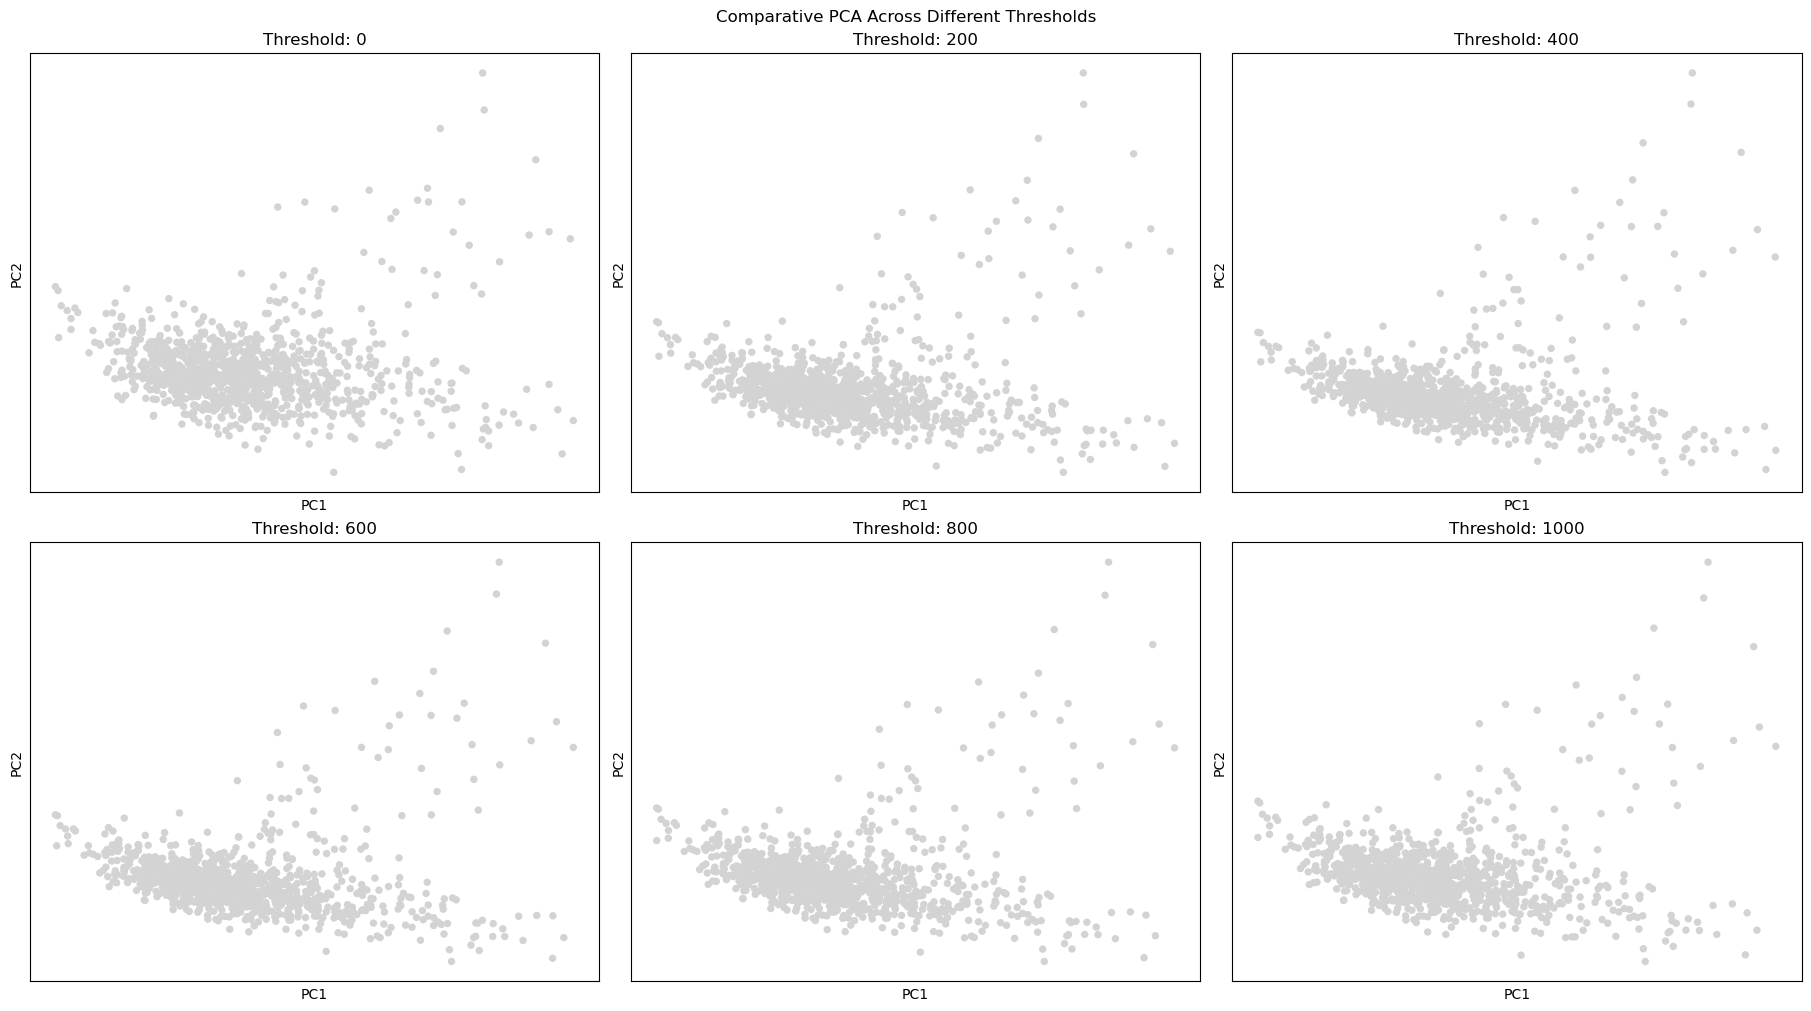

In [24]:
# Determine the layout of the subplot grid
# Prepare the figure for subplots
n_thresholds = len(thresholds)
n_cols = 3
n_rows = -(-n_thresholds // n_cols)  # Ceiling division to get enough rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5), constrained_layout=True)
plt.subplots_adjust(hspace=0.5)

# Flatten axes array for easy indexing
axes = axes.ravel()

for idx, threshold in enumerate(thresholds):
    # Retrieve the corresponding AnnData object
    adata_filtered = adata_dict[threshold]
    
    # Plot the PCA
    sp.pl.pca(adata_filtered, ax=axes[idx], show=False, title=f'Threshold: {threshold}')
    
# Hide any unused subplot axes
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.suptitle('Comparative PCA Across Different Thresholds')
plt.show()

# 5 - UMAP 

/tmp/ipykernel_1046/490104710.py:5: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.5)
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = 

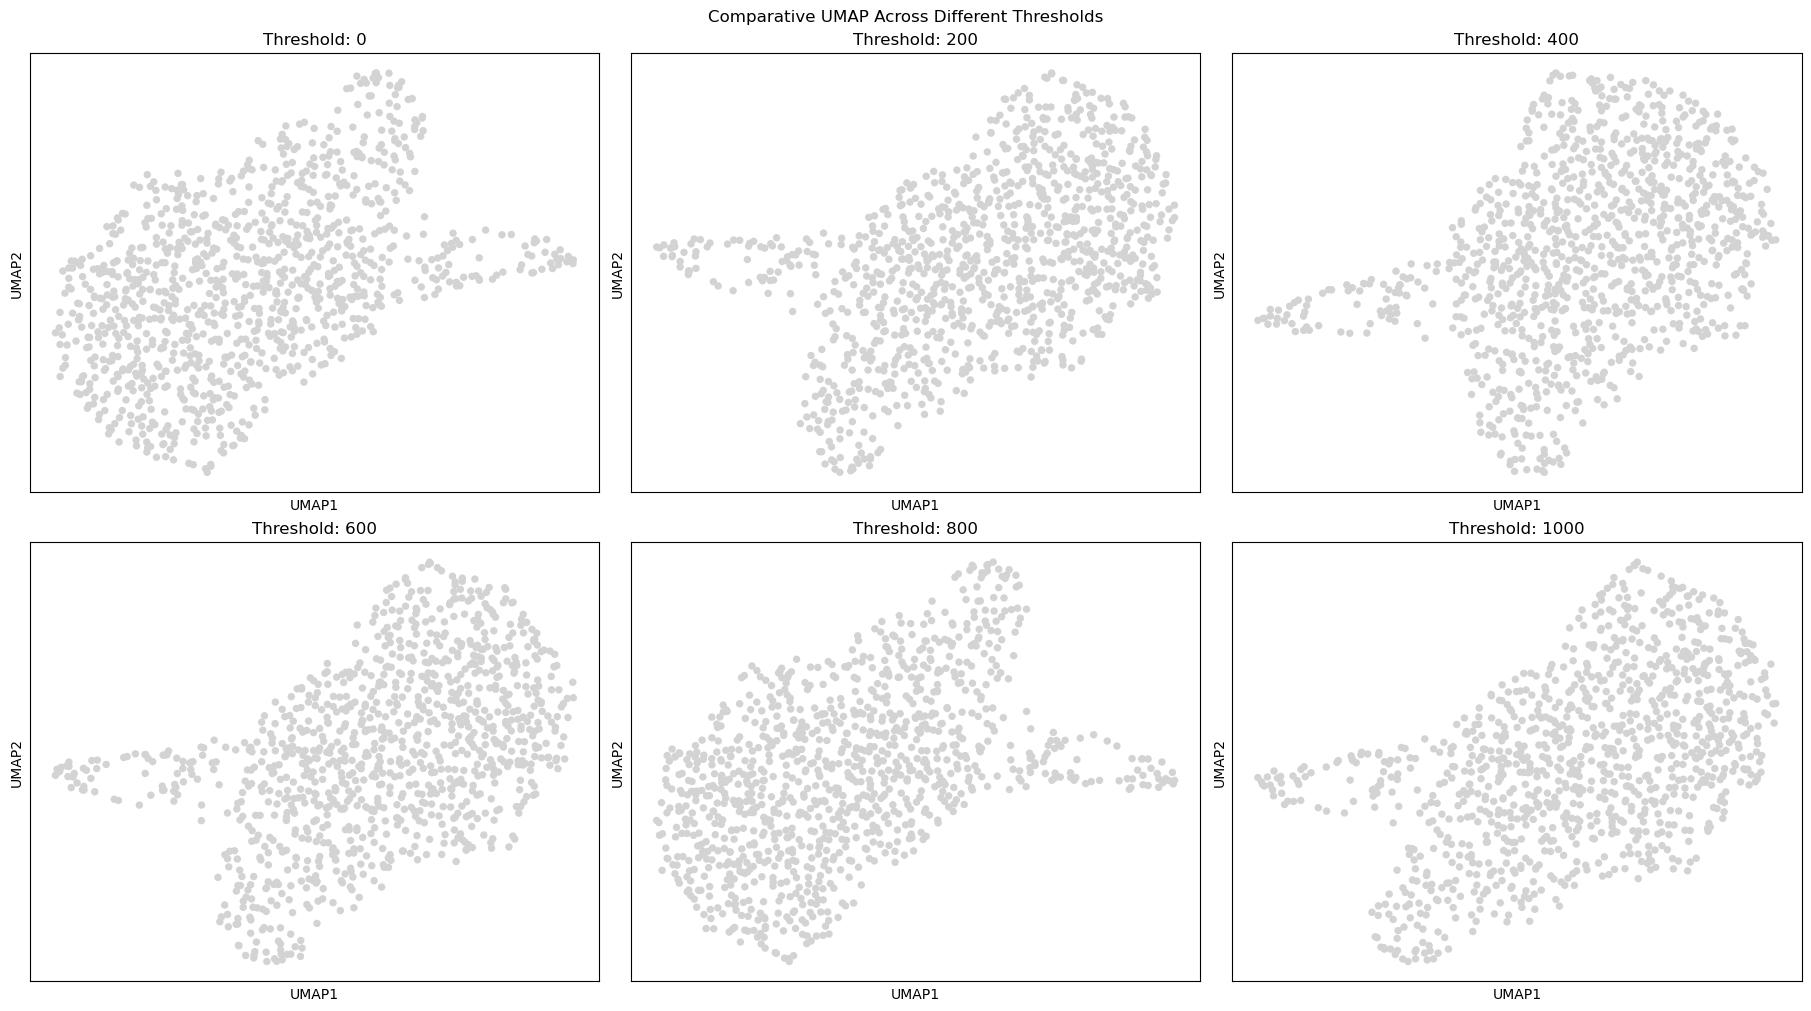

In [25]:
n_thresholds = len(thresholds)
n_cols = 3
n_rows = -(-n_thresholds // n_cols)  # Ceiling division to get enough rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5), constrained_layout=True)
plt.subplots_adjust(hspace=0.5)

# Flatten axes array for easy indexing
axes = axes.ravel()

for idx, threshold in enumerate(thresholds):
    # Retrieve the corresponding AnnData object
    adata_filtered = adata_dict[threshold]
    
    # Plot the PCA
    sp.pl.umap(adata_filtered, ax=axes[idx], show=False, title=f'Threshold: {threshold}')
    
# Hide any unused subplot axes
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.suptitle('Comparative UMAP Across Different Thresholds')
plt.show()

/tmp/ipykernel_1046/679338355.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap('viridis', len(unique_categories))


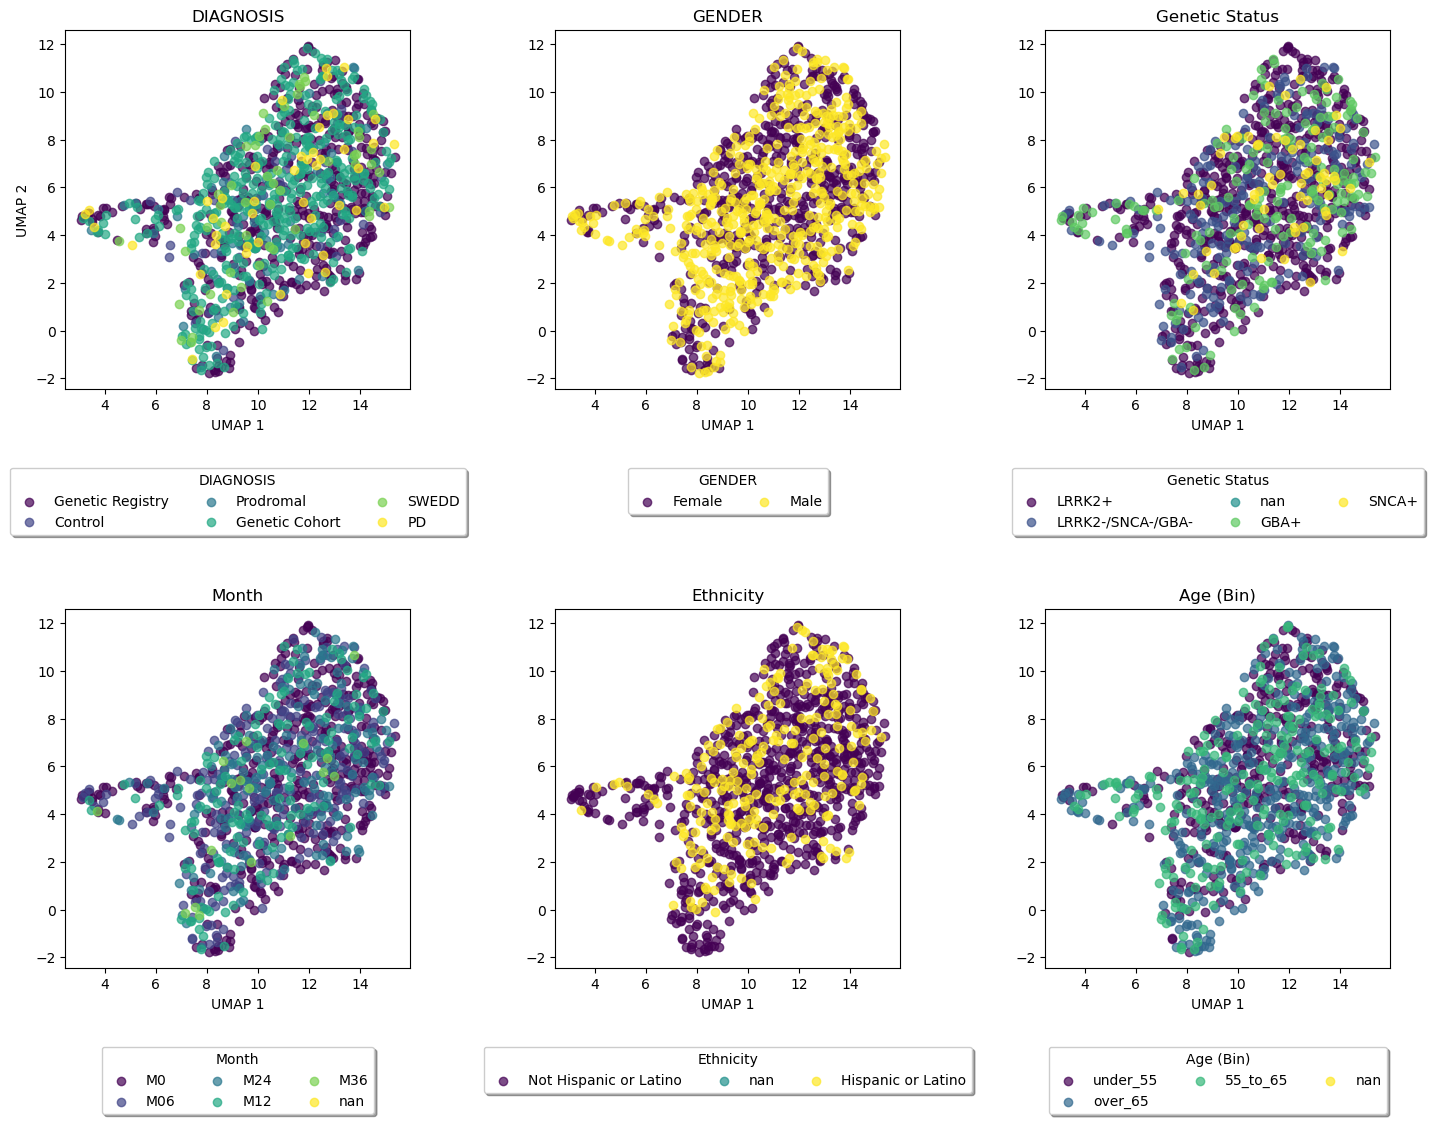

In [26]:
# List of features you're interested in
features = ['DIAGNOSIS', 'GENDER', 'Genetic Status', 'Month', 'Ethnicity', 'Age (Bin)']

# Assuming umap_coords contains your UMAP coordinates from the specific adata object you're interested in
umap_coords = adata_dict[600].obsm['X_umap']

# Create a figure with 2 rows of subplots. The first row has 3 subplots, the second row has 1
fig, axes = plt.subplots(2, 3, figsize=(15, 12))  # Adjust figsize as needed

# Since the second row only needs 1 plot, we'll adjust the unused subplot axes
# Hide the unused subplot axes in the second row
# axes[1, 2].axis('off')

# Flatten the axes array and remove the hidden ones for easy indexing
axes = [axes[0, 0], axes[0, 1], axes[0, 2], axes[1, 0], axes[1,1], axes[1,2]]

for ax, feature in zip(axes, features):
    # Get unique categories within the feature
    unique_categories = adata_dict[600].obs[feature].unique()
    
    # Generate a color palette
    palette = plt.cm.get_cmap('viridis', len(unique_categories))
    
    # Plot each category
    for i, category in enumerate(unique_categories):
        indices = adata_dict[600].obs[feature] == category
        ax.scatter(umap_coords[indices, 0], umap_coords[indices, 1], color=palette(i), label=category, alpha=0.7)
    
    # Configure the subplot
    ax.set_title(feature)
    ax.set_xlabel('UMAP 1')
    if ax is axes[0]:  # Only add y-label to the first subplot of each row for clarity
        ax.set_ylabel('UMAP 2')
    
    # Adjust legend. Place it below the subplot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3, title=feature)

plt.tight_layout(pad=3.0)  # Adjust layout and increase pad for better spacing
plt.show()

# 6 - Outlier detection

In [27]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Convert to DataFrame for easier handling
expr_data = pd.DataFrame(adata_dict[600].raw.X.T, index=adata_dict[600].var_names, columns=adata_dict[600].obs_names)

# Step 1: Calculate Pearson Correlation Matrix
correlation_matrix = expr_data.corr(method='pearson')

# Step 2: Hierarchical Clustering
# Convert the Pearson correlation matrix to distances

distances = 1 - correlation_matrix
linkage_matrix = linkage(squareform(distances), method='ward')

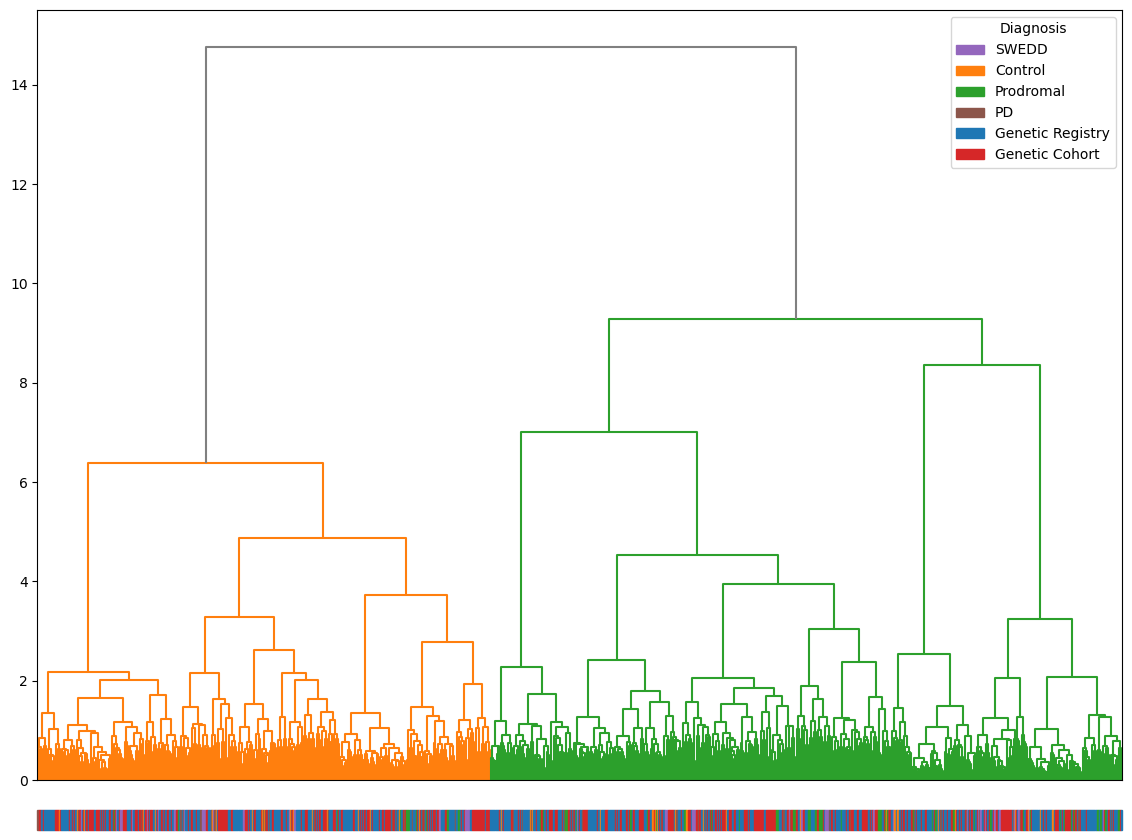

In [28]:
# Step 3: Plot the Dendrogram to visualize clustering and potentially identify outliers
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Adjust figure size to be larger to accommodate the dendrogram
fig, ax_dendro = plt.subplots(figsize=(14, 10)) 

# Plot the dendrogram
dendro = dendrogram(linkage_matrix, ax=ax_dendro, above_threshold_color='grey',no_labels=True)

# Retrieve the order of leaves and the colors for the color bar

leaf_order = dendro['leaves']
disease_labels_ordered = adata_dict[600].obs['DIAGNOSIS'].iloc[leaf_order]
unique_diseases = adata_dict[600].obs['DIAGNOSIS'].unique()
color_map = {disease: f"C{i}" for i, disease in enumerate(unique_diseases)}
colors = [color_map[diagnosis] for diagnosis in disease_labels_ordered]


# Create the color bar, making sure it aligns with the x-axis of the dendrogram
color_bar_ax = fig.add_axes([ax_dendro.get_position().x0,  # left alignment with dendrogram
                             ax_dendro.get_position().y0 - 0.05,  # below the dendrogram with a small gap
                             ax_dendro.get_position().width,  # same width as dendrogram
                             0.02])  # height of color bar

# Draw colored patches for each sample in the color bar
for i, color in enumerate(colors):
    color_bar_ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color, clip_on=False))

# Set the color bar limits to match the number of samples
color_bar_ax.set_xlim(0, len(colors))
color_bar_ax.set_ylim(0, 1)
color_bar_ax.axis('off')  # Hide the color bar axis

# Create a custom legend for 'DIAGNOSIS'
legend_patches = [mpatches.Patch(color=color_map[diagnosis], label=diagnosis) for diagnosis in set(disease_labels_ordered)]
ax_dendro.legend(handles=legend_patches, title="Diagnosis", loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

The dendrogram generated from your hierarchical clustering analysis presents a visual summary of the data structure based on the similarity of samples. It shows how individual samples are grouped together into clusters, and how these clusters are further combined into larger clusters, eventually leading to the formation of one single cluster that includes all samples.

Here's an interpretation of your dendrogram:

Two Main Clusters: The most prominent feature of your dendrogram is the presence of two main clusters, differentiated by color (orange and green). These clusters indicate that there are two primary groupings of samples within your dataset, which suggests that, based on the measures used (e.g., gene expression levels), there are two distinct sets of samples when considering their overall profiles.

No Small Isolated Clusters Early On: As we trace from the bottom of the dendrogram (where individual samples are represented) towards the top, we do not observe small clusters or individual samples that are isolated early on from the larger structure. In other words, most samples are grouped with other samples at relatively low heights, indicating a degree of similarity with their nearest neighbors.

Gradual Merging of Clusters: The branches in your dendrogram merge progressively without any sudden large jumps in distance until the two main clusters come together. This gradual merging suggests that there is a relative homogeneity within the clusters and that samples within each cluster are more similar to each other than to those outside their cluster.

Final Merge at High Distance: The two main clusters eventually merge at a relatively high point on the dendrogram, around a distance of 14. This indicates that while there is homogeneity within each cluster, the clusters themselves are quite different from each other. However, this distinction between clusters does not imply outliers but rather significant variation between two distinct groups in the dataset.

Absence of Outliers: Typically, outliers in a dataset would appear as individual samples or small subgroups that merge with the rest of the data at a notably higher distance compared to the rest of the merges. This would appear as long vertical lines connecting a sample or a small group to the main body of the dendrogram. Since such patterns are not observed in the dendrogram provided, there is no strong evidence to suggest the presence of outliers. All samples appear to be incorporated into the main clusters at reasonable distances, indicating that the dataset is relatively cohesive.

In conclusion, the dendrogram suggests that the dataset is comprised of two primary groups of samples that are internally consistent but distinct from each other. The absence of long, isolated branches merging at high distances indicates that the data does not exhibit potential outliers, at least not in the context of the clustering method and distance metric applied. The samples do not appear to exhibit anomalous behavior that would set them apart as outliers within the context of this analysis.

# 7 - Clean the metadata

## 7.1 - Define the apply_rules function

In [30]:
# Function to apply the rules
def apply_rules(row):
    if row['DIAGNOSIS'] == 'Control' and row['Disease Status'] == 'Healthy Control':
        return 'Control'
    elif row['DIAGNOSIS'] == 'Prodromal' and row['Disease Status'] == 'Prodromal':
        return 'Other'
    elif row['DIAGNOSIS'] == 'Genetic Registry' and pd.isna(row['Disease Status']):
        return 'Other'
    elif row['DIAGNOSIS'] == 'Genetic Registry' and row['Disease Status'] == 'Genetic PD':
        return 'Case'
    elif row['DIAGNOSIS'] == 'Genetic Registry' and row['Disease Status'] == 'Genetic Unaffected':
        return 'Control'
    elif row['DIAGNOSIS'] == 'Genetic Cohort' and row['Disease Status'] == 'Genetic PD':
        return 'Case'
    elif row['DIAGNOSIS'] == 'SWEDD' and pd.isna(row['Disease Status']):
        return 'Case'
    elif row['DIAGNOSIS'] == 'SWEDD' and row['Disease Status'] == '':
        return 'Case'
    elif row['DIAGNOSIS'] == 'Genetic Cohort' and row['Disease Status'] == 'Genetic Unaffected':
        return 'Control'
    else:
        return row['Case Control']  # Return the existing value if none of the rules apply

# Apply the rules to each row in the DataFrame
metadata_filt['Case Control'] = metadata_filt.apply(apply_rules, axis=1)

/tmp/ipykernel_1046/3211631223.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_filt['Case Control'] = metadata_filt.apply(apply_rules, axis=1)


## 7.2 - Create a group column

In [31]:
# Create the new 'group' column by concatenating 'Case Control' and 'Month'

metadata_filt['group'] = metadata_filt['Case Control'] + "_" + metadata_filt['Month']

/tmp/ipykernel_1046/908625548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_filt['group'] = metadata_filt['Case Control'] + "_" +metadata_filt['Month']


In [32]:
metadata_filt['group'].value_counts() # Check the categories of the "group" feature
# It would be nice to show the missing values

group
Control_M0     250
Case_M0        206
Case_M06       140
Case_M24        98
Control_M06     87
Case_M12        82
Control_M24     57
Control_M12     37
Other_M12       23
Other_M24       22
Other_M06       21
Other_M0         6
Other_M36        6
Case_M36         6
Control_M36      5
Name: count, dtype: int64

In [33]:
metadata_filt['Case Control'].isna().sum() # No missing values in Case Control feature after using the function apply_rules

0

# 8 - Saving metadata

In [34]:
metadata_filt.to_csv('PD_metadata_filtered.csv')

In [43]:
metadata_filt[metadata_filt['Month'].isna()]

,QCflagIR3,Specimen Bar Code,PATNO_x,GENDER,DIAGNOSIS,CLINICAL_EVENT,Quantity (ug),Concentration (ng/ul),Concentration Flag,Submitted Volume (ul),...,Uniquely mapped (%),Total reads,UPDRS1 score,UPDRS2 score,UPDRS3 score,UPDRS4 score,UPDRS totscore,UPSIT,moca,group
HudAlphaID,,,,,,,,,,,,,,,,,,,,,
5104-SL-3740,pass,0003476750,4066,Male,SWEDD,V02,1.0,130.1,1,7.686395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
metadata_filt['Case Control'].value_counts()

Case Control
Case       533
Control    436
Other       78
Name: count, dtype: int64